# **Combined Cycle Power Plant (CCPP)** 
The Combined **Cycle Power Plant** over 6 years **(2006-2011)**, when the power plant was set to work with full load. 

Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. 

In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.

**DataSource :** https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant

**Pınar Tüfekci**, Çorlu Faculty of Engineering, Namık Kemal University, Tekirdağ, Turkey. Email: ptufekci@nku.edu.tr

**Heysem Kaya**, Department of Computer Engineering, Boğaziçi University,  İstanbul, Turkey, Email: heysem@boun.edu.tr




In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Tensorflow Version
tf.__version__

'2.5.0'

In [3]:
# Import Dataset
df = pd.read_excel('../content/power_plant.xlsx')

In [4]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


- Temperature (AT) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (PE) 420.26-495.76 MW

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [6]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [7]:
# Selection Independent and Depedent variable or Feature and Target Variable Selection ...
y = df.iloc[:,-1].values
X = df.iloc[:, :-1].values

In [8]:
print(X)
print(y)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]
[463.26 444.37 488.56 ... 429.57 435.74 453.28]


In [9]:
# Spliting datasets into Training and Testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 0)

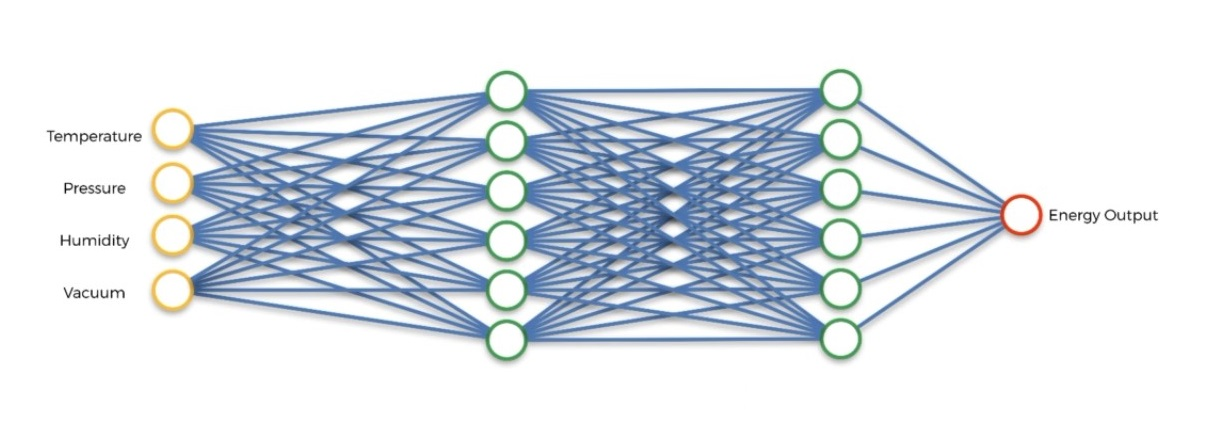

In [10]:
# Build Up ANN Model
from keras.models import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=1))

In [12]:
# Compile ANN Model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Training ANN Model for Training sets
model.fit(X_train,y_train, epochs= 100, batch_size= 32)

Epoch 1/100
240/240 [==============================] - 23s 1ms/step - loss: 550419.2320
Epoch 2/100
240/240 [==============================] - 0s 1ms/step - loss: 89184.6170
Epoch 3/100
240/240 [==============================] - 0s 1ms/step - loss: 462.0955
Epoch 4/100
240/240 [==============================] - 0s 1ms/step - loss: 451.7624
Epoch 5/100
240/240 [==============================] - 0s 1ms/step - loss: 430.0224
Epoch 6/100
240/240 [==============================] - 0s 1ms/step - loss: 416.1622
Epoch 7/100
240/240 [==============================] - 0s 1ms/step - loss: 389.6964
Epoch 8/100
240/240 [==============================] - 0s 1ms/step - loss: 373.6622
Epoch 9/100
240/240 [==============================] - 0s 1ms/step - loss: 349.0298
Epoch 10/100
240/240 [==============================] - 0s 1ms/step - loss: 324.4604
Epoch 11/100
240/240 [==============================] - 0s 1ms/step - loss: 297.5286
Epoch 12/100
240/240 [==============================] - 0s 1ms/step 

In [14]:
# Prediction ANN Model for Test sets
model.predict(X_test)

array([[431.7904 ],
       [462.9038 ],
       [466.40295],
       ...,
       [473.66376],
       [440.403  ],
       [459.6521 ]], dtype=float32)

In [16]:
np.set_printoptions(precision=2)
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(len(y_pred),1)
y_test = y_test.reshape(len(y_test),1)
print(np.concatenate((y_pred,y_test),1))

[[431.79 431.23]
 [462.9  460.01]
 [466.4  461.14]
 ...
 [473.66 473.26]
 [440.4  438.  ]
 [459.65 463.28]]
